<a href="https://colab.research.google.com/github/JuanDValenciano/HyperspectralTools_Multi/blob/master/Python/Colaboratory/RadianceCorrection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Correction Radiance

by: JuanD Valenciano. UNAL-2020

Ruta de archivo:
Python/Colaboratory/RadianceCorrection.ipynb

Se activa el almacenamiento en google drive.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


instalación de la libreria adicionales

In [4]:
!pip install PyOpenGL PyOpenGL_accelerate
#!pip install -U wxPython
!pip install -U \
    -f https://extras.wxpython.org/wxPython4/extras/linux/gtk3/ubuntu-16.04 \
    wxPython
!pip install Pillow
!pip install spectral

     |████████████████████████████████| 542kB 2.9MB/s 
  Created wheel for PyOpenGL-accelerate: filename=PyOpenGL_accelerate-3.1.5-cp36-cp36m-linux_x86_64.whl size=1593655 sha256=9573a155c6a6b7f964869b7687bfa026d63895b0e29ce3bf9fdb4b2673caa34b
  Stored in directory: /root/.cache/pip/wheels/bd/21/77/99670ceca25fddb3c2b60a7ae44644b8253d1006e8ec417bcc
Successfully built PyOpenGL-accelerate
Looking in links: https://extras.wxpython.org/wxPython4/extras/linux/gtk3/ubuntu-16.04
     |████████████████████████████████| 104.4MB 44kB/s 
     |████████████████████████████████| 153kB 2.8MB/s 
  Created wheel for spectral: filename=spectral-0.20-cp36-none-any.whl size=183917 sha256=c1c5b42e549b0266ae6ab9090756a27647d12f85e0e6ea8a6df4e045edc9b2bb
  Stored in directory: /root/.cache/pip/wheels/ad/cf/f3/3cab28f6aed46f15c8db09c6ad678483610426261025e61ff8
Successfully built spectral


Cargar librerias.

In [0]:
import spectral.io.envi as envi
#import spectral
from spectral import *
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#import wx
#from wx import glcanvas
import numpy as np 
import warnings
import pandas as pd
#from IPython.html.widgets import *
from ipywidgets import *
#from IPython.html.widgets import interact # IPython < 4.x

## Implementación definiciones

Pasar a un archivo diferente, Instalar la libreria y probarla en Colab

[información libreria](https://sporco.readthedocs.io/en/latest/_modules/sporco/metric.html
)

In [0]:
import numpy as np

# Relation Signal noise 
def SNR(img):
    MeanValueImg = np.mean(img)
    StdValueImg = np.std(img)
    ValueSNR = MeanValueImg/StdValueImg
    return (ValueSNR)    

# equivalent number of looks
def ENL(img):
    MeanValueImg = np.mean(img)
    varValueImg = np.var(img)
    ValueENL = MeanValueImg**2/varValueImg**2
    return(ValueENL)

#Speckle suppression index
def SSI(imgOriginal, imgFilter):
    ValueSSI = (np.sqrt(np.std(imgFilter)**2)/np.mean(imgFilter))*(np.mean(imgOriginal)/np.sqrt(np.std(imgOriginal)**2))
    return(ValueSSI)
#Speckle suppression and mean preservation index
def SMPI(imgOriginal, imgFilter):
    MO = 1 + np.abs(np.mean(imgOriginal) - np.mean(imgFilter))
    ValueSMPI = MO * (np.sqrt(np.std(imgFilter)**2))/(np.sqrt(np.std(imgOriginal)**2))
    return(ValueSMPI)

def QualityFactor(imgOriginal, imgFilter):
    Y_S = np.mean(imgOriginal) - np.abs(np.mean(imgOriginal) - np.mean(imgFilter))
    LO = ENL(imgOriginal)
    VARF = np.var(imgFilter)
    MO = 1 + np.abs(np.mean(imgOriginal) - np.mean(imgFilter))
    ValueQ = Y_S**2/(LO*VARF**2)
    return(ValueQ)

Datos hiperespectrales GoogleDrive


In [6]:
dataTest_hdr     = '/content/drive/My Drive/Tesis/DatosAnalizar/Hyspex_Radiance/Test/rawData/test2_16000_us_2x_2019-11-25T124320_corr.hdr'
dataTest_hyspex  = '/content/drive/My Drive/Tesis/DatosAnalizar/Hyspex_Radiance/Test/rawData/test2_16000_us_2x_2019-11-25T124320_corr.hyspex'
dataTest = envi.open(dataTest_hdr, dataTest_hyspex)

dataTommy_hdr    = '/content/drive/My Drive/Tesis/DatosAnalizar/Hyspex_Radiance/Tommy/rawData/tom_cgs_01_16000_us_2x_2019-11-24T121227_corr.hdr'
dataTommy_hyspex = '/content/drive/My Drive/Tesis/DatosAnalizar/Hyspex_Radiance/Tommy/rawData/tom_cgs_01_16000_us_2x_2019-11-24T121227_corr.hyspex'
dataTommy = envi.open(dataTommy_hdr, dataTommy_hyspex)

############## Test ##############
######  dataTest uint16_t  #######
dataTest_uint16t_corr_rad_hdr  = '/content/drive/My Drive/Tesis/DatosAnalizar/Hyspex_Radiance/Test/Data_uint16t_Test/test2_16000_us_2x_2019-11-25T124320_corr_rad.hdr'
dataTest_uint16t_corr_rad_img  = '/content/drive/My Drive/Tesis/DatosAnalizar/Hyspex_Radiance/Test/Data_uint16t_Test/test2_16000_us_2x_2019-11-25T124320_corr_rad.img'
dataTest_uint16t_corr_rad = envi.open(dataTest_uint16t_corr_rad_hdr, dataTest_uint16t_corr_rad_img)

dataTest_uint16t_corr_rad_REF_hdr  = '/content/drive/My Drive/Tesis/DatosAnalizar/Hyspex_Radiance/Test/Data_uint16t_Test/test2_16000_us_2x_2019-11-25T124320_corr_rad_REF.hdr'
dataTest_uint16t_corr_rad_REF_img  = '/content/drive/My Drive/Tesis/DatosAnalizar/Hyspex_Radiance/Test/Data_uint16t_Test/test2_16000_us_2x_2019-11-25T124320_corr_rad_REF.img'
dataTest_uint16t_corr_rad_REF = envi.open(dataTest_uint16t_corr_rad_REF_hdr, dataTest_uint16t_corr_rad_REF_img)
######  dataTest Float  ##########
dataTest_Float_corr_rad_hdr  = '/content/drive/My Drive/Tesis/DatosAnalizar/Hyspex_Radiance/Test/Data_All_Float_Test/test2_16000_us_2x_2019-11-25T124320_corr_rad_f32.hdr'
dataTest_Float_corr_rad_img  = '/content/drive/My Drive/Tesis/DatosAnalizar/Hyspex_Radiance/Test/Data_All_Float_Test/test2_16000_us_2x_2019-11-25T124320_corr_rad_f32.img'
dataTest_Float_corr_rad = envi.open(dataTest_Float_corr_rad_hdr, dataTest_Float_corr_rad_img)

dataTest_Float_corr_rad_REF_hdr  = '/content/drive/My Drive/Tesis/DatosAnalizar/Hyspex_Radiance/Test/Data_All_Float_Test/test2_16000_us_2x_2019-11-25T124320_corr_rad_REF.hdr'
dataTest_Float_corr_rad_REF_img  = '/content/drive/My Drive/Tesis/DatosAnalizar/Hyspex_Radiance/Test/Data_All_Float_Test/test2_16000_us_2x_2019-11-25T124320_corr_rad_REF.img'
dataTest_Float_corr_rad_REF = envi.open(dataTest_Float_corr_rad_REF_hdr, dataTest_Float_corr_rad_REF_img)
##################################
############# Tommy ##############
#######  Tommy uint16_t  #########
Tommy_uint16t_corr_rad_hdr  = '/content/drive/My Drive/Tesis/DatosAnalizar/Hyspex_Radiance/Tommy/Data_uint16t/tom_cgs_01_16000_us_2x_2019-11-24T121227_corr_rad.hdr'
Tommy_uint16t_corr_rad_img  = '/content/drive/My Drive/Tesis/DatosAnalizar/Hyspex_Radiance/Tommy/Data_uint16t/tom_cgs_01_16000_us_2x_2019-11-24T121227_corr_rad.img'
Tommy_uint16t_corr_rad = envi.open(Tommy_uint16t_corr_rad_hdr, Tommy_uint16t_corr_rad_img)

Tommy_uint16t_corr_rad_REF_hdr  = '/content/drive/My Drive/Tesis/DatosAnalizar/Hyspex_Radiance/Tommy/Data_uint16t/tom_cgs_01_16000_us_2x_2019-11-24T121227_corr_rad_REF.hdr'
Tommy_uint16t_corr_rad_REF_img  = '/content/drive/My Drive/Tesis/DatosAnalizar/Hyspex_Radiance/Tommy/Data_uint16t/tom_cgs_01_16000_us_2x_2019-11-24T121227_corr_rad_REF.img'
Tommy_uint16t_corr_rad_REF = envi.open(Tommy_uint16t_corr_rad_REF_hdr, Tommy_uint16t_corr_rad_REF_img)
#######  Tommy Float  ############
Tommy_Float_corr_rad_hdr  = '/content/drive/My Drive/Tesis/DatosAnalizar/Hyspex_Radiance/Tommy/Data_All_Float/tom_cgs_01_16000_us_2x_2019-11-24T121227_corr_rad_f32.hdr'
Tommy_Float_corr_rad_img  = '/content/drive/My Drive/Tesis/DatosAnalizar/Hyspex_Radiance/Tommy/Data_All_Float/tom_cgs_01_16000_us_2x_2019-11-24T121227_corr_rad_f32.img'
Tommy_Float_corr_rad = envi.open(Tommy_Float_corr_rad_hdr, Tommy_Float_corr_rad_img)

Tommy_Float_corr_rad_REF_hdr  = '/content/drive/My Drive/Tesis/DatosAnalizar/Hyspex_Radiance/Tommy/Data_All_Float/tom_cgs_01_16000_us_2x_2019-11-24T121227_corr_rad_REF.hdr'
Tommy_Float_corr_rad_REF_img  = '/content/drive/My Drive/Tesis/DatosAnalizar/Hyspex_Radiance/Tommy/Data_All_Float/tom_cgs_01_16000_us_2x_2019-11-24T121227_corr_rad_REF.img'
Tommy_Float_corr_rad_REF = envi.open(Tommy_Float_corr_rad_REF_hdr, Tommy_Float_corr_rad_REF_img)
##################################

print('####################################################################\n')
print('rawData\n')
print('dataTest:', dataTest)
print('uint16_t\n')
print('dataTest_uint16t_corr_rad:', dataTest_uint16t_corr_rad)
print('dataTest_uint16t_corr_rad_REF:', dataTest_uint16t_corr_rad_REF)
print('float\n')
print('dataTest_Float_corr_rad:', dataTest_Float_corr_rad)
print('dataTest_Float_corr_rad_REF:', dataTest_Float_corr_rad_REF)
print('####################################################################\n')
print('rawData\n')
print('dataTest:', dataTommy)
print('uint16_t\n')
print('Tommy_uint16t_corr_rad:', Tommy_uint16t_corr_rad)
print('Tommy_uint16t_corr_rad_REF:', Tommy_uint16t_corr_rad_REF)
print('float\n')
print('Tommy_Float_corr_rad:', Tommy_Float_corr_rad)
print('Tommy_Float_corr_rad_REF:', Tommy_Float_corr_rad_REF)
print('####################################################################\n')

####### spectral target ##########
dataSpectralTarget = pd.read_csv('/content/drive/My Drive/Tesis/software/spectra_target.csv',   header=None)
print('spectral target\n', dataSpectralTarget)
print('####################################################################\n')
##################################
'''
#img.info()
#view = imshow(img)
#view_nd(img)
#save_rgb('rgb.jpg', img, [29, 19, 9])
'''

####################################################################

rawData

dataTest: 	Data Source:   '/content/drive/My Drive/Tesis/DatosAnalizar/Hyspex_Radiance/Test/rawData/test2_16000_us_2x_2019-11-25T124320_corr.hyspex'
	# Rows:            800
	# Samples:        1600
	# Bands:           160
	Interleave:        BIL
	Quantization:  16 bits
	Data format:    uint16
uint16_t

dataTest_uint16t_corr_rad: 	Data Source:   '/content/drive/My Drive/Tesis/DatosAnalizar/Hyspex_Radiance/Test/Data_uint16t_Test/test2_16000_us_2x_2019-11-25T124320_corr_rad.img'
	# Rows:            800
	# Samples:        1600
	# Bands:           160
	Interleave:        BIL
	Quantization:  16 bits
	Data format:    uint16
dataTest_uint16t_corr_rad_REF: 	Data Source:   '/content/drive/My Drive/Tesis/DatosAnalizar/Hyspex_Radiance/Test/Data_uint16t_Test/test2_16000_us_2x_2019-11-25T124320_corr_rad_REF.img'
	# Rows:            800
	# Samples:        1600
	# Bands:           160
	Interleave:        BIL
	Quantization:  

"\n#img.info()\n#view = imshow(img)\n#view_nd(img)\n#save_rgb('rgb.jpg', img, [29, 19, 9])\n"

##Visualizar Rawdata
Imagen RGB de los datos seleccionados,

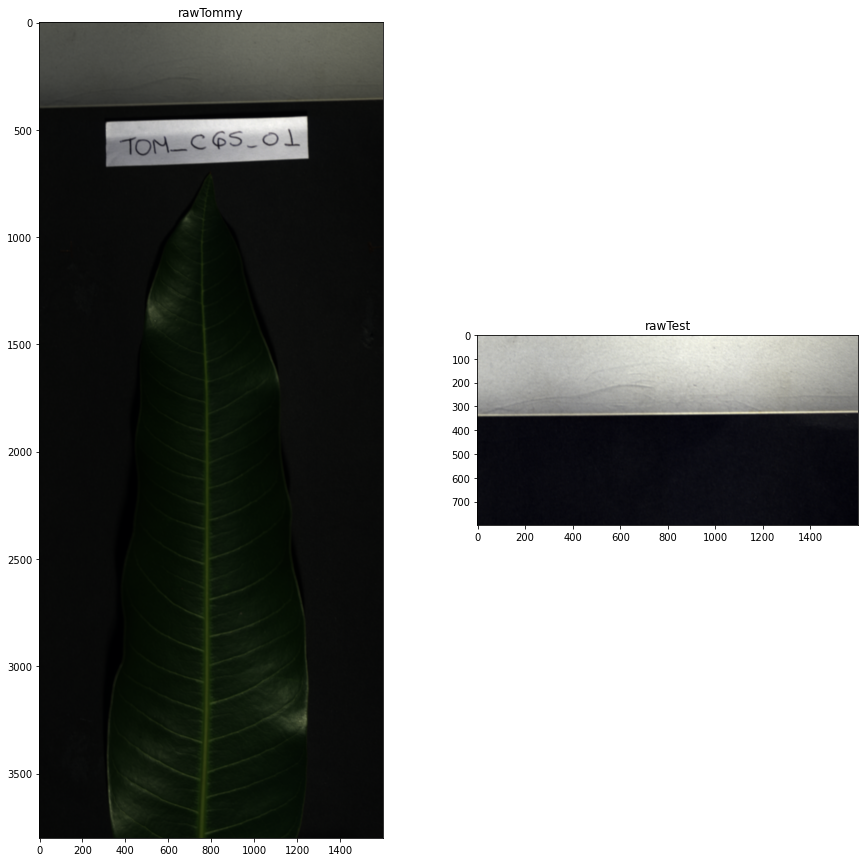

In [7]:
plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(get_rgb(dataTommy)), plt.title('rawTommy')
plt.subplot(122), plt.imshow(get_rgb(dataTest)), plt.title('rawTest')
plt.show()

##spectral target

Visualización de la filmina de referencia.


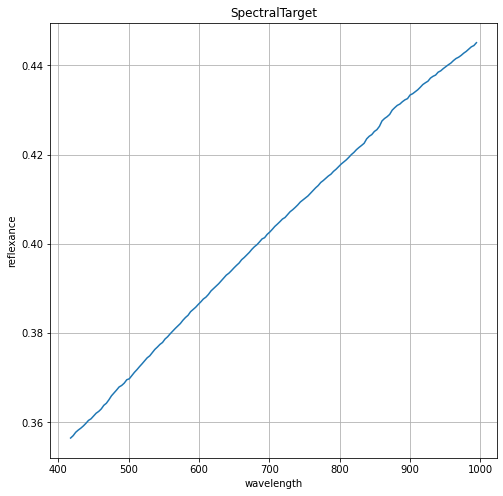

In [58]:
plt.figure(figsize=(8,8))
plt.plot(dataSpectralTarget[0],dataSpectralTarget[1])
plt.title('SpectralTarget')
plt.grid()
#plt.ylim(bottom = 0, top = 1)
plt.xlabel('wavelength')
plt.ylabel('reflexance')
plt.show()

##Dos experimentos calibrados con la aplicación de Hyspex.

Datos de dos experimentos: 



1.   El primero se toma una muestra de mango de tomy, en el cual se hace la calibración con la aplicación de Hyspex de la siguiente manera.

*   rawData_Tommy -> RAD_Hyspex(uint16_t(rawData_Tommy)) -> RAD_Hyspex_REF(uint16_t(rawData_Tommy))
*   rawData_Tommy -> RAD_Hyspex(float(rawData_Tommy)) -> RAD_Hyspex_REF(float(rawData_Tommy))

2.   El segundo se toma una muestra de datos de test, se aplica el mismo procedimiento.

*   rawData_Test -> RAD_Hyspex(uint16_t(rawData_Test)) -> RAD_Hyspex_REF(uint16_t(rawData_Test))
*   rawData_Test -> RAD_Hyspex(float(rawData_Test)) -> RAD_Hyspex_REF(float(rawData_Test))

Con eso se busca saber qué está haciendo la aplicación de Hyspex por debajo y con las fórmulas de calibración lograr un resultado similar.


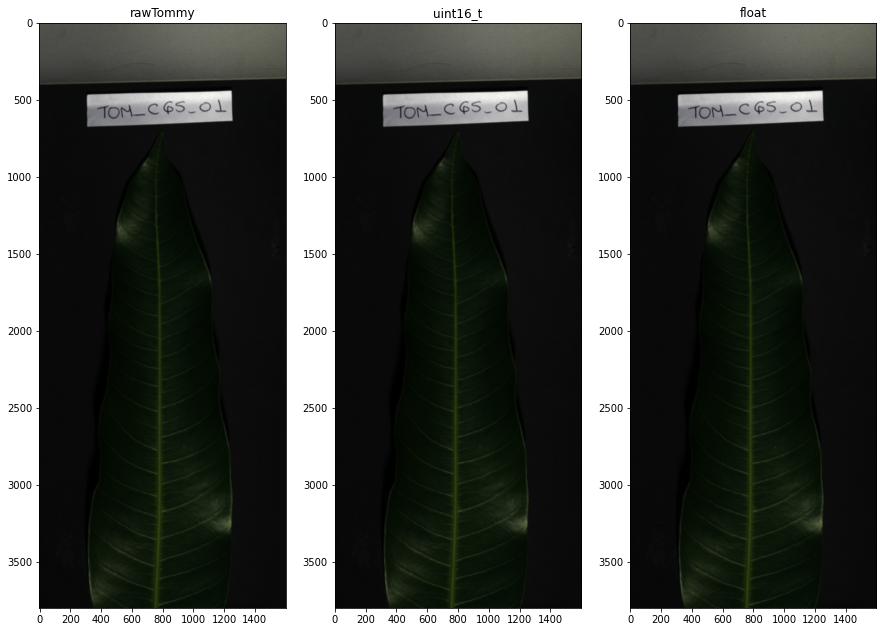

In [60]:
##Datos del mando Tommy
plt.figure(figsize=(15,15))
plt.subplot(131), plt.imshow(get_rgb(dataTommy)), plt.title('rawTommy')
plt.subplot(132), plt.imshow(get_rgb(Tommy_uint16t_corr_rad)), plt.title('uint16_t')
plt.subplot(133), plt.imshow(get_rgb(Tommy_Float_corr_rad)), plt.title('float')
plt.show()

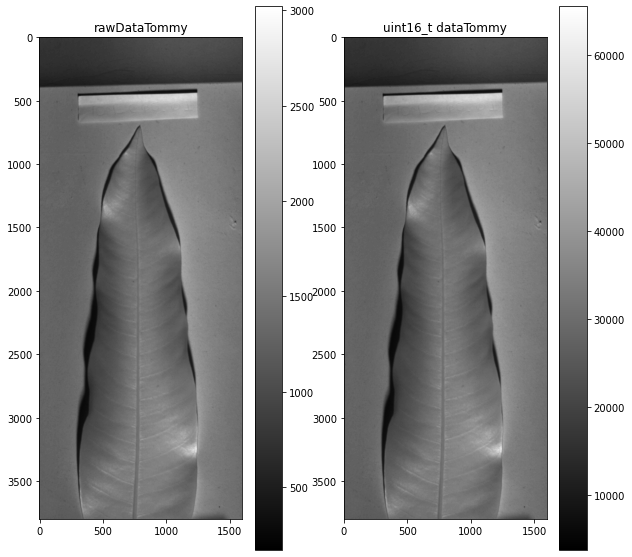

rawDataTommy min:  172 rawDataTommy max:  3021
uint16_t DataTommy min:  3731 uint16_t DataTommy max:  65535


In [159]:
#Tomar los datos uint16_t, verificar cual es el cambio.

'''
DataHyspec.read_band(159)
plt.subplot(131), plt.imshow(get_rgb(dataTommy)), plt.title('rawTommy')
plt.subplot(132), plt.imshow(get_rgb(Tommy_uint16t_corr_rad)), plt.title('uint16_t')

print(QualityFactor())
'''

plt.figure(figsize=(10,10))        
plt.subplot(121), plt.imshow(dataTommy.read_band(159), cmap=plt.cm.gray), plt.title('rawDataTommy')
plt.colorbar();
plt.subplot(122), plt.imshow(Tommy_uint16t_corr_rad.read_band(159), cmap=plt.cm.gray), plt.title('uint16_t dataTommy')
plt.colorbar();
plt.show()

print('rawDataTommy min: ', np.min(dataTommy.read_band(159)), 'rawDataTommy max: ', np.max(dataTommy.read_band(159)))
print('uint16_t DataTommy min: ', np.min(Tommy_uint16t_corr_rad.read_band(159)), 'uint16_t DataTommy max: ', np.max(Tommy_uint16t_corr_rad.read_band(159)))

###            snr(vref, vcmp):
#print('SNR: ', snr(dataTommy.read_band(159), Tommy_uint16t_corr_rad.read_band(159)))

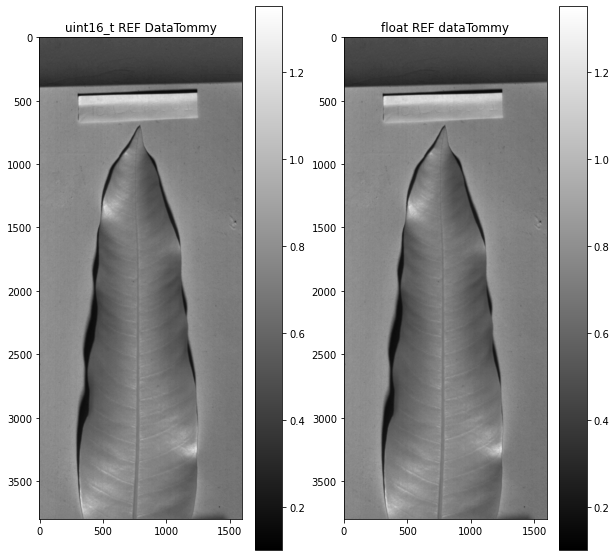

Tommy_uint16t_corr_rad_REF min:  0.10234231 Tommy_uint16t_corr_rad_REF max:  1.3517046
Tommy_Float_corr_rad_REF min:  0.102342464 Tommy_Float_corr_rad_REF max:  1.3516982
QualityFactor(1):  1.0000011126639397
QualityFactor(2):  0.9999988873372984


In [160]:
#Tomar los datos Float REF, pasando primero por la converson uint16_t -> float y floa -> float, verificar si hubo cambio ?
# Datos con la Ref de calibración.
plt.figure(figsize=(10,10))        
plt.subplot(121), plt.imshow(Tommy_uint16t_corr_rad_REF.read_band(159), cmap=plt.cm.gray), plt.title('uint16_t REF DataTommy')
plt.colorbar();
plt.subplot(122), plt.imshow(Tommy_Float_corr_rad_REF.read_band(159), cmap=plt.cm.gray), plt.title('float REF dataTommy')
plt.colorbar();
plt.show()

print('Tommy_uint16t_corr_rad_REF min: ', np.min(Tommy_uint16t_corr_rad_REF.read_band(159)), 'Tommy_uint16t_corr_rad_REF max: ', np.max(Tommy_uint16t_corr_rad_REF.read_band(159)))
print('Tommy_Float_corr_rad_REF min: ', np.min(Tommy_Float_corr_rad_REF.read_band(159)), 'Tommy_Float_corr_rad_REF max: ', np.max(Tommy_Float_corr_rad_REF.read_band(159)))

print('QualityFactor(1): ', QualityFactor( Tommy_uint16t_corr_rad_REF.read_band(159), Tommy_Float_corr_rad_REF.read_band(159))) #QualityFactor(1) = 1.0000011126639397
print('QualityFactor(2): ', QualityFactor( Tommy_Float_corr_rad_REF.read_band(159), Tommy_uint16t_corr_rad_REF.read_band(159))) #QualityFactor(2) = 0.9999988873372984


Se o

In [0]:
##      PSNR(original, compressed)
#print('SNR: ', SNR( [1 2 3; 4 5 6], [1 2 3; 4 5 6])) 
#print( QualityFactor( np.array([[1,2],[3,4]]), np.array([[1,2],[3,4]])) )
#print( SNR( np.array([[1,2],[3,4]])) )
#print( ENL( np.array([[1,2],[3,4]])) )
#print(Tommy_uint16t_corr_rad_REF.read_band(159))
#############   snr(vref, vcmp):
#print('SNR: ', snr(Tommy_Float_corr_rad_REF.read_band(159), Tommy_uint16t_corr_rad_REF.read_band(159))) #SNR:  97.17823852012617
#print('SNR: ', snr(Tommy_uint16t_corr_rad_REF.read_band(159), Tommy_Float_corr_rad_REF.read_band(159))) #SNR:  97.17824093624388
##
##      psnr(vref, vcmp)
##      PSNR(original, compressed)
#print(Tommy_uint16t_corr_rad_REF.read_band(159))
#print('psnr: ', psnr(Tommy_uint16t_corr_rad_REF.read_band(159), Tommy_Float_corr_rad_REF.read_band(159))) 

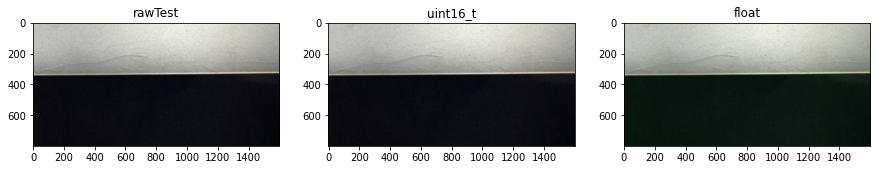

In [61]:
##Datos Test
##Datos del mando Tommy
plt.figure(figsize=(15,15))
plt.subplot(131), plt.imshow(get_rgb(dataTest)), plt.title('rawTest')
plt.subplot(132), plt.imshow(get_rgb(dataTest_uint16t_corr_rad)), plt.title('uint16_t')
plt.subplot(133), plt.imshow(get_rgb(dataTest_Float_corr_rad)), plt.title('float')
plt.show()